In [1]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# 1. Görüntüleri yüklemek için ReadFiles fonksiyonu 
def ReadFiles(path):
    # İki adet boş dizi açıyorum bunlara fotoğraf verilerini ve başlıklarını atayacağım
    images = []
    labels = []
    # Dosya işlemleri ile seçilen yol içerisindeki dosyaları lsteletip döngüye sokuyorum
    for foldername in os.listdir(path):
        # Döngüden gelen veri uygun label ile eşleştiğinde label değişkenini günceliyorum
        if foldername == "avocado":
            # Görüntü için oluşturulan etiket
            label = 1
        elif foldername == "apple":
            # Görüntü için oluşturulan etiket
            label = 0
        else:
            continue
        # Dosya işlemlerini kullanarak image dosyalarının klasörlerini alıyorum
        folderpath = os.path.join(path, foldername)
        # Alınan yolları listeleyip bir döngüye sokuyorum 
        for filename in os.listdir(folderpath):
            # Burada image dosyalarının adreslerini alıyorum
            imgpath = os.path.join(folderpath, filename)
            # Adresten gelen görüntüyü gri tonlamaya dönüştürüyorum
            img = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
            # Görüntüyü yeniden boyutlandırıyorum
            img = cv2.resize(img, (100, 100))
            # Piksel değerlerini [0, 1] aralığına getirdim
            img = img / 255.0
            # Görüntüyü ve labelliniboş dizilere ekliyorum
            images.append(img)
            labels.append(label)
    # Dizileri arraye çeviriyorum        
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [3]:
# Veri yükleme işlemi burada redfile fonk. çağrılıyor
X, y = ReadFiles("dataset/train")

In [4]:
# PCA kullanılarak veri boyutunu 50'ye indirgeme
indir_ver = PCA(n_components=50, whiten=True)
X = X.reshape(X.shape[0], -1)
indir_ver.fit(X)
X_indrgnmis = indir_ver.transform(X)

In [5]:
# Yapay sinir ağı modelini eğitme ve test etme
# Farklı MLP yapıları tanımlıyorum
mlp_zeka = [(5, 2), (50, 20), (500, 200), (5000, 1000)]
# Doğrulukları kaydedip daha sonra çizdirmek için bir dizi tanımlıyorum
dogruluklar = []
# Her MLP yapısı için ayrı ayrı model eğitiyorum
for mlp_arch in mlp_zeka:
    mlp = MLPClassifier(hidden_layer_sizes=mlp_arch, max_iter=600)
    mlp.fit(X_indrgnmis, y)
    
     # Test verilerini yüklüyorum ve PCA ile boyut indirgeme yapıyorum
    X_test, y_test = ReadFiles("dataset/test")
    X_test_flat = X_test.reshape(X_test.shape[0], -1)
    X_test_pca = indir_ver.transform(X_test_flat)
    
    # Modeli test verileri üzerinde kullanıyorum ve doğruluk skorunu hesaplıyorum
    y_pred = mlp.predict(X_test_pca)
    dogruluk = accuracy_score(y_test, y_pred)
    
    # Elde edilen doğruluk skorunu listeye ekliyorum
    dogruluklar.append(dogruluk)

C:\Users\theca\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


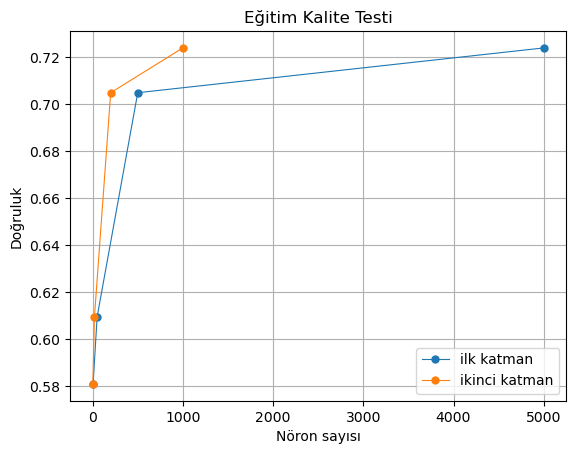

In [6]:
# Nöron sayısına göre doğruluk skorlarını görselleştirme yapıyorum
plt.plot([5, 50, 500,  5000], dogruluklar, marker="o",linewidth=0.8,markersize=5,label='ilk katman')
plt.plot([2,  20,  200,  1000], dogruluklar,marker="o",linewidth=0.8,markersize=5,label='ikinci katman')

# Grafik özelliklerini ayarlıyorum
plt.xlabel("Nöron sayısı")
plt.ylabel("Doğruluk")
plt.title("Eğitim Kalite Testi")
plt.legend()
plt.grid()
plt.show()

yorum: Nöron sayısı arttıkça doğruluk oranının arttığı görülür.Çok büyük modellerin eğitimi daha uzun sürüyor ve overfitting riski daha yüksek olabiliyor. veri setindeki sınıf dengesizliği (avakado ve elma resimlerinin sayısı arasındaki fark) göz önünde bulundurulmalıdır. sınıf ağırlıklarının ayarlanması ile daha doğru sonuçlar elde edilebilir.